**Approach to Mobile Price Range Prediction:**
1. Import all the libraries
2. Load and Audit the data
3. Data preparation and Data Transformation
      1. Missing values: impute all missing values using Mean,Median and Mode
      2. Inconistent values: Replace all inconsistence with consistent values
      3. Outliers: Transform or let algorithm deal
4. Data Visualization
5. Data Analysis
      1. Uni-Variant Analysis(Mean,Median and Mode,Skewness)
      2. Bi-Varient Analysis(Correlation,Covariance,Chi-square test)
      3. Multi-Varient Analysis
          1. Regression:Not a regression problem
              1. Classification:
                 1.KNN
                 2.Logistic reg
                 3.Random forest
                 4.GB BOOST(XGB)
      4.Compare results
      5.Create a app

# IMPORTING THE LIBRARIES


---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency

# AUDIT THE DATA

---



In [ ]:
df=pd.read_csv('/content/Mobile_data.csv')

In [ ]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
df.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

# VISUALIZATION

---



{'whiskers': [<matplotlib.lines.Line2D at 0x7f019dbe5af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f019db85070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f019dbe5850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f019db855b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f019db85850>],
 'means': []}

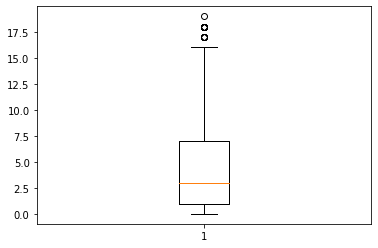

In [ ]:
plt.boxplot(df['fc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f019b285310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f019b285730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f019b285070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f019b285c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f019b285f10>],
 'means': []}

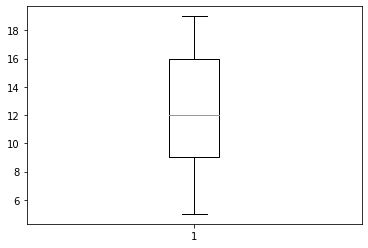

In [ ]:
plt.boxplot(df['sc_h'])

In [ ]:
#sns.pairplot(df)

In [ ]:
np.sqrt(2000)

44.721359549995796

# SPLITTING TRAIN AND TEST DATA

---



In [ ]:
x = df.iloc[:,:-1]
y = df['price_range']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123)

# MODELS

In [ ]:
knn=KNeighborsClassifier(n_neighbors=45)

In [ ]:
knn.fit(x_train,y_train)
preds_knn_train=knn.predict(x_train)
preds_knn_test=knn.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_mat = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Accuracy of the model is: ', round(acc_score, 2))
  print(conf_mat)
  print(clas_rep)

In [ ]:
model_eval(y_train, preds_knn_train)

Accuracy of the model is:  0.93
[[405   8   0   0]
 [ 16 372  12   0]
 [  0  28 334  22]
 [  0   0  20 383]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       413
           1       0.91      0.93      0.92       400
           2       0.91      0.87      0.89       384
           3       0.95      0.95      0.95       403

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
model_eval(y_test, preds_knn_test)

Accuracy of the model is:  0.92
[[86  1  0  0]
 [ 7 90  3  0]
 [ 0  8 99  9]
 [ 0  0  5 92]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.91      0.90      0.90       100
           2       0.93      0.85      0.89       116
           3       0.91      0.95      0.93        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



# APP

In [ ]:
!pip install Gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

In [ ]:
import pickle
import gradio as gr

In [ ]:
with open('knn_model.pkl','wb')as f:
  pickle.dump(knn,f)

In [ ]:
x.columns


Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [ ]:
def make_prediction(battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time):
    with open('knn_model.pkl','rb') as f:
        clf=pickle.load(f)
        preds=clf.predict([[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time]])
        if preds==0:
            return('Low cost')
        elif preds==1:
            return('Low-Medium cost')
        elif preds==2:
            return('Medium-High cost')
        else:
            return('High cost')

In [ ]:
battery_power=gr.Number(label="Enter Average battery power btw 501-2000 : ")
clock_speed=gr.Number(label="Enter Clock Speed btw 0.5-3 : ")
fc=gr.Number(label="Enter fc btw 0-19 : ")
int_memory=gr.Number(label="Enter int_mem btw2-64 : ")
m_dep=gr.Number(label="Enter m_dep btw 0.1-1 : ")
mobile_wt=gr.Number(label="Enter weight btw 80-200 : ")
n_cores=gr.Number(label="Enter cores btw 1-8 : ")
pc=gr.Number(label="Enter pc btw 0-20 : ")
px_height=gr.Number(label="Enter height btw 0-1960 : ")
px_width=gr.Number(label="Enter width btw 500-1998 : ")
ram=gr.Number(label="Enter ram 256-3998 : ")
sc_h=gr.Number(label="Enter sc_h btw 5-19 : ")
sc_w=gr.Number(label="Enter sc_w btw 0-18 : ")
talk_time=gr.Number(label="Enter talktime btw 2-20 : ")

output=gr.Textbox()

In [ ]:
app=gr.Interface(fn=make_prediction,inputs=[battery_power, clock_speed, fc, int_memory, m_dep,
       mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h,
       sc_w, talk_time],outputs=output)
app.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


In [ ]:
import xgboost as xgb

In [ ]:
dtrain_clf=xgb.DMatrix(x_train,y_train)
dtest_clf=xgb.DMatrix(x_test,y_test)

In [ ]:
type(x_train)

pandas.core.frame.DataFrame

In [ ]:
type(dtrain_clf)

xgboost.core.DMatrix

In [ ]:
params={'objective':'multi:softprob','tree_method':'hist','num_class':4}

In [ ]:
xgb_classifier=xgb.XGBClassifier(n_estimators=100,tree_method='hist')

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb_preds_train=xgb_classifier.predict(x_train)
xgb_preds_test=xgb_classifier.predict(x_test)

In [ ]:
model_eval(y_train,xgb_preds_train)

Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test,xgb_preds_test)

Accuracy of the model is:  0.92
[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   8 100   8]
 [  0   0   7  90]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.90      0.91      0.91       100
           2       0.90      0.86      0.88       116
           3       0.92      0.93      0.92        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.92      0.91       400



NAIVE BAYES

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc_preds_train=svc.predict(x_train)
svc_preds_test=svc.predict(x_test)

In [ ]:
def model_eval(actual, predicted):
  acc_score = accuracy_score(actual, predicted)
  conf_mat = confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('Accuracy of the model is: ', round(acc_score, 2))
  print(conf_mat)
  print(clas_rep)

In [ ]:
model_eval(y_train,svc_preds_train)

Accuracy of the model is:  0.96
[[413   0   0   0]
 [ 12 381   7   0]
 [  0  14 355  15]
 [  0   0  11 392]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       413
           1       0.96      0.95      0.96       400
           2       0.95      0.92      0.94       384
           3       0.96      0.97      0.97       403

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
model_eval(y_test,svc_preds_test)

Accuracy of the model is:  0.94
[[ 87   0   0   0]
 [ 10  89   1   0]
 [  0   5 106   5]
 [  0   0   4  93]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        87
           1       0.95      0.89      0.92       100
           2       0.95      0.91      0.93       116
           3       0.95      0.96      0.95        97

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [ ]:
preds_train_gb=svc.predict(x_train)
preds_test_gb=svc.predict(x_test)

In [ ]:
model_eval(y_train,preds_train_gb)

Accuracy of the model is:  0.96
[[413   0   0   0]
 [ 12 381   7   0]
 [  0  14 355  15]
 [  0   0  11 392]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       413
           1       0.96      0.95      0.96       400
           2       0.95      0.92      0.94       384
           3       0.96      0.97      0.97       403

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
model_eval(y_test,preds_test_gb)

Accuracy of the model is:  0.94
[[ 87   0   0   0]
 [ 10  89   1   0]
 [  0   5 106   5]
 [  0   0   4  93]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        87
           1       0.95      0.89      0.92       100
           2       0.95      0.91      0.93       116
           3       0.95      0.96      0.95        97

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [ ]:
from collections import Counter

In [ ]:
counter=Counter(y_train)
print(counter)

Counter({0: 413, 3: 403, 1: 400, 2: 384})
